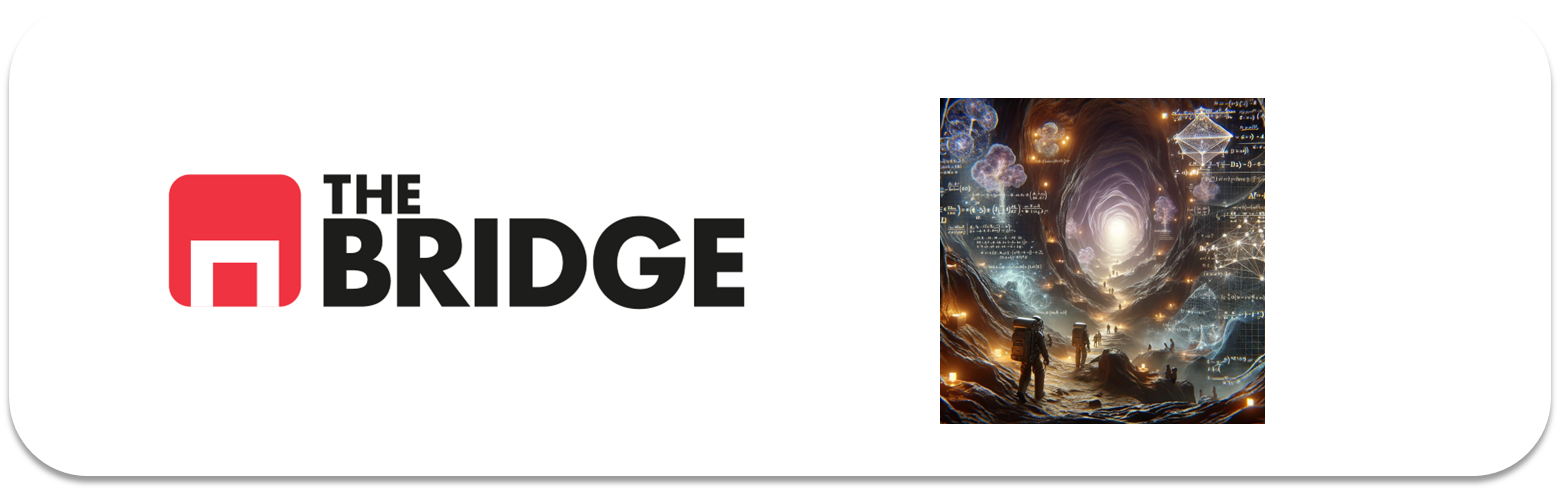

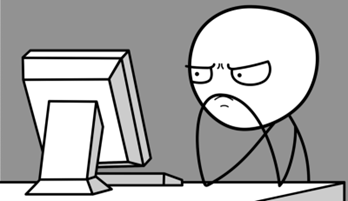

Para ejercitarte y afianzar lo aprendido sobre **Keras y DL**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Predecir eficiencia de gasolina

En este conjuntos de ejercicios vamos a trabajar sobre el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) para construir un modelo DL para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Para la construcción del modelo vamos a utilizar Keras.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np

### Ejercicio 1

Carga los datos en un dataframe, utilizando como nombre de columnas los siguientes:

```python
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
``` 


In [3]:
# Definir nombres de columnas
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 
                'Acceleration', 'Model Year', 'Origin']

# Cargar datos
df = pd.read_csv("./data/Autos_data.txt", names=column_names, delim_whitespace=True)

df.head(5)


/var/folders/lc/xsbjt6rs2gq59y6tqrhdjzb40000gn/T/ipykernel_2524/3857333366.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("./data/Autos_data.txt", names=column_names, delim_whitespace=True)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 18.0 to 31.0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    int64  
 1   Cylinders     398 non-null    float64
 2   Displacement  398 non-null    object 
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    int64  
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 28.0+ KB


### Ejercicio 2: Limpieza inicial

Echa un primer vistazo. Limpia columnas "raras". Deshazte de nulos (cuidado aquí), arregla el tipo de las features numéricas si fuera necesario. Haz una lista de las features categóricas que tuvieramos que convertir posteriormente. (Es antes del split pero no importa para este ejercicio)

In [5]:
# Definir nombres de columnas correctos, agregando el nombre del auto
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 
                'Acceleration', 'Model Year', 'Origin', 'Car Name']

# Cargar los datos correctamente
df = pd.read_csv("./data/Autos_data.txt", names=column_names, delim_whitespace=True)

# Revisar valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())

# Revisar tipos de datos
print("\nTipos de datos antes de la conversión:\n", df.dtypes)

# Reemplazar "?" en Horsepower y convertirlo a float
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')

# Eliminar filas con valores nulos (por ejemplo, en Horsepower)
df.dropna(inplace=True)

# Convertir columnas al tipo correcto
df['Cylinders'] = df['Cylinders'].astype(int)
df['Displacement'] = df['Displacement'].astype(float)
df['Origin'] = df['Origin'].astype(int)  # Se convertirá en categórica después

# Identificar las columnas categóricas para codificar en el futuro
categorical_features = ['Origin']

# Verificar limpieza
print("\nTipos de datos después de la conversión:\n", df.dtypes)
print("\nEjemplo de datos limpios:\n", df.head())

# Mostrar las features categóricas detectadas
print("\nFeatures categóricas identificadas:", categorical_features)


Valores nulos por columna:
 MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
Car Name        0
dtype: int64

Tipos de datos antes de la conversión:
 MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
Car Name         object
dtype: object

Tipos de datos después de la conversión:
 MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
Car Name         object
dtype: object

Ejemplo de datos limpios:
     MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0        

/var/folders/lc/xsbjt6rs2gq59y6tqrhdjzb40000gn/T/ipykernel_2524/1837296812.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("./data/Autos_data.txt", names=column_names, delim_whitespace=True)


### Ejercicio 3

Antes de seguir nos informan que las etiquetas de "origin" correspoden a  USA para el 1, Europa para el 2 y Japón para el 3. Convierte origin a esos valores porque queremos tener el literal. Luego haz directamente un one-hot encoding de esas variable.  

*NOTA: Realmente los one-hot-encoding se pueden hacer contra el dataset original desde el principio (no afectan unos a otros), si nos los hacemos es porque hasta que no se han analizado las variables puede que no tengamos claro que queremos hacer si una codificación ordinal, una vectorización (onehot) o bien queremos hacer otro cambio en la variable y esos vienen dados por la relación de la categórica con el target y por tanto sólo se pueden ver en el train. Pero si por lo que sea sabemos seguros que vamos a hacer vectorización no hay problema en hacerlo antes del split. Por otro lado, siempre conviene quedarse con una categoria unkown para valores que pueden llegar en el futuro antes de un recalibrado.*


In [6]:
# Mapear valores de Origin a nombres de continentes
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

# Aplicar one-hot encoding
df = pd.get_dummies(df, columns=['Origin'], drop_first=True)

# Verificar resultado
print(df.head())


    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year                   Car Name  Origin_Japan  Origin_USA  
0          70  chevrolet chevelle malibu         False        True  
1          70          buick skylark 320         False        True  
2          70         plymouth satellite         False        True  
3          70              amc rebel sst         False        True  
4          70                ford torino         False        True  


### Ejercicio 4

Divide los datos en train y test. Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo. Emplea una variable target para guardar el nombre de la columna target.

NOTA: El resultado tienen que ser dos datasets

In [7]:
from sklearn.model_selection import train_test_split

# Definir la variable target
target = 'MPG'

# Separar features (X) y target (y)
X = df.drop(columns=[target])
y = df[target]

# Dividir en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Verificar tamaños de los conjuntos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)


Tamaño de X_train: (313, 9)
Tamaño de X_test: (79, 9)
Tamaño de y_train: (313,)
Tamaño de y_test: (79,)


### Ejercicio 5

Inspecciona los datos. Revisa rápidamente la distribución conjunta del dataset de entrenamiento mediante un grid de gráficos

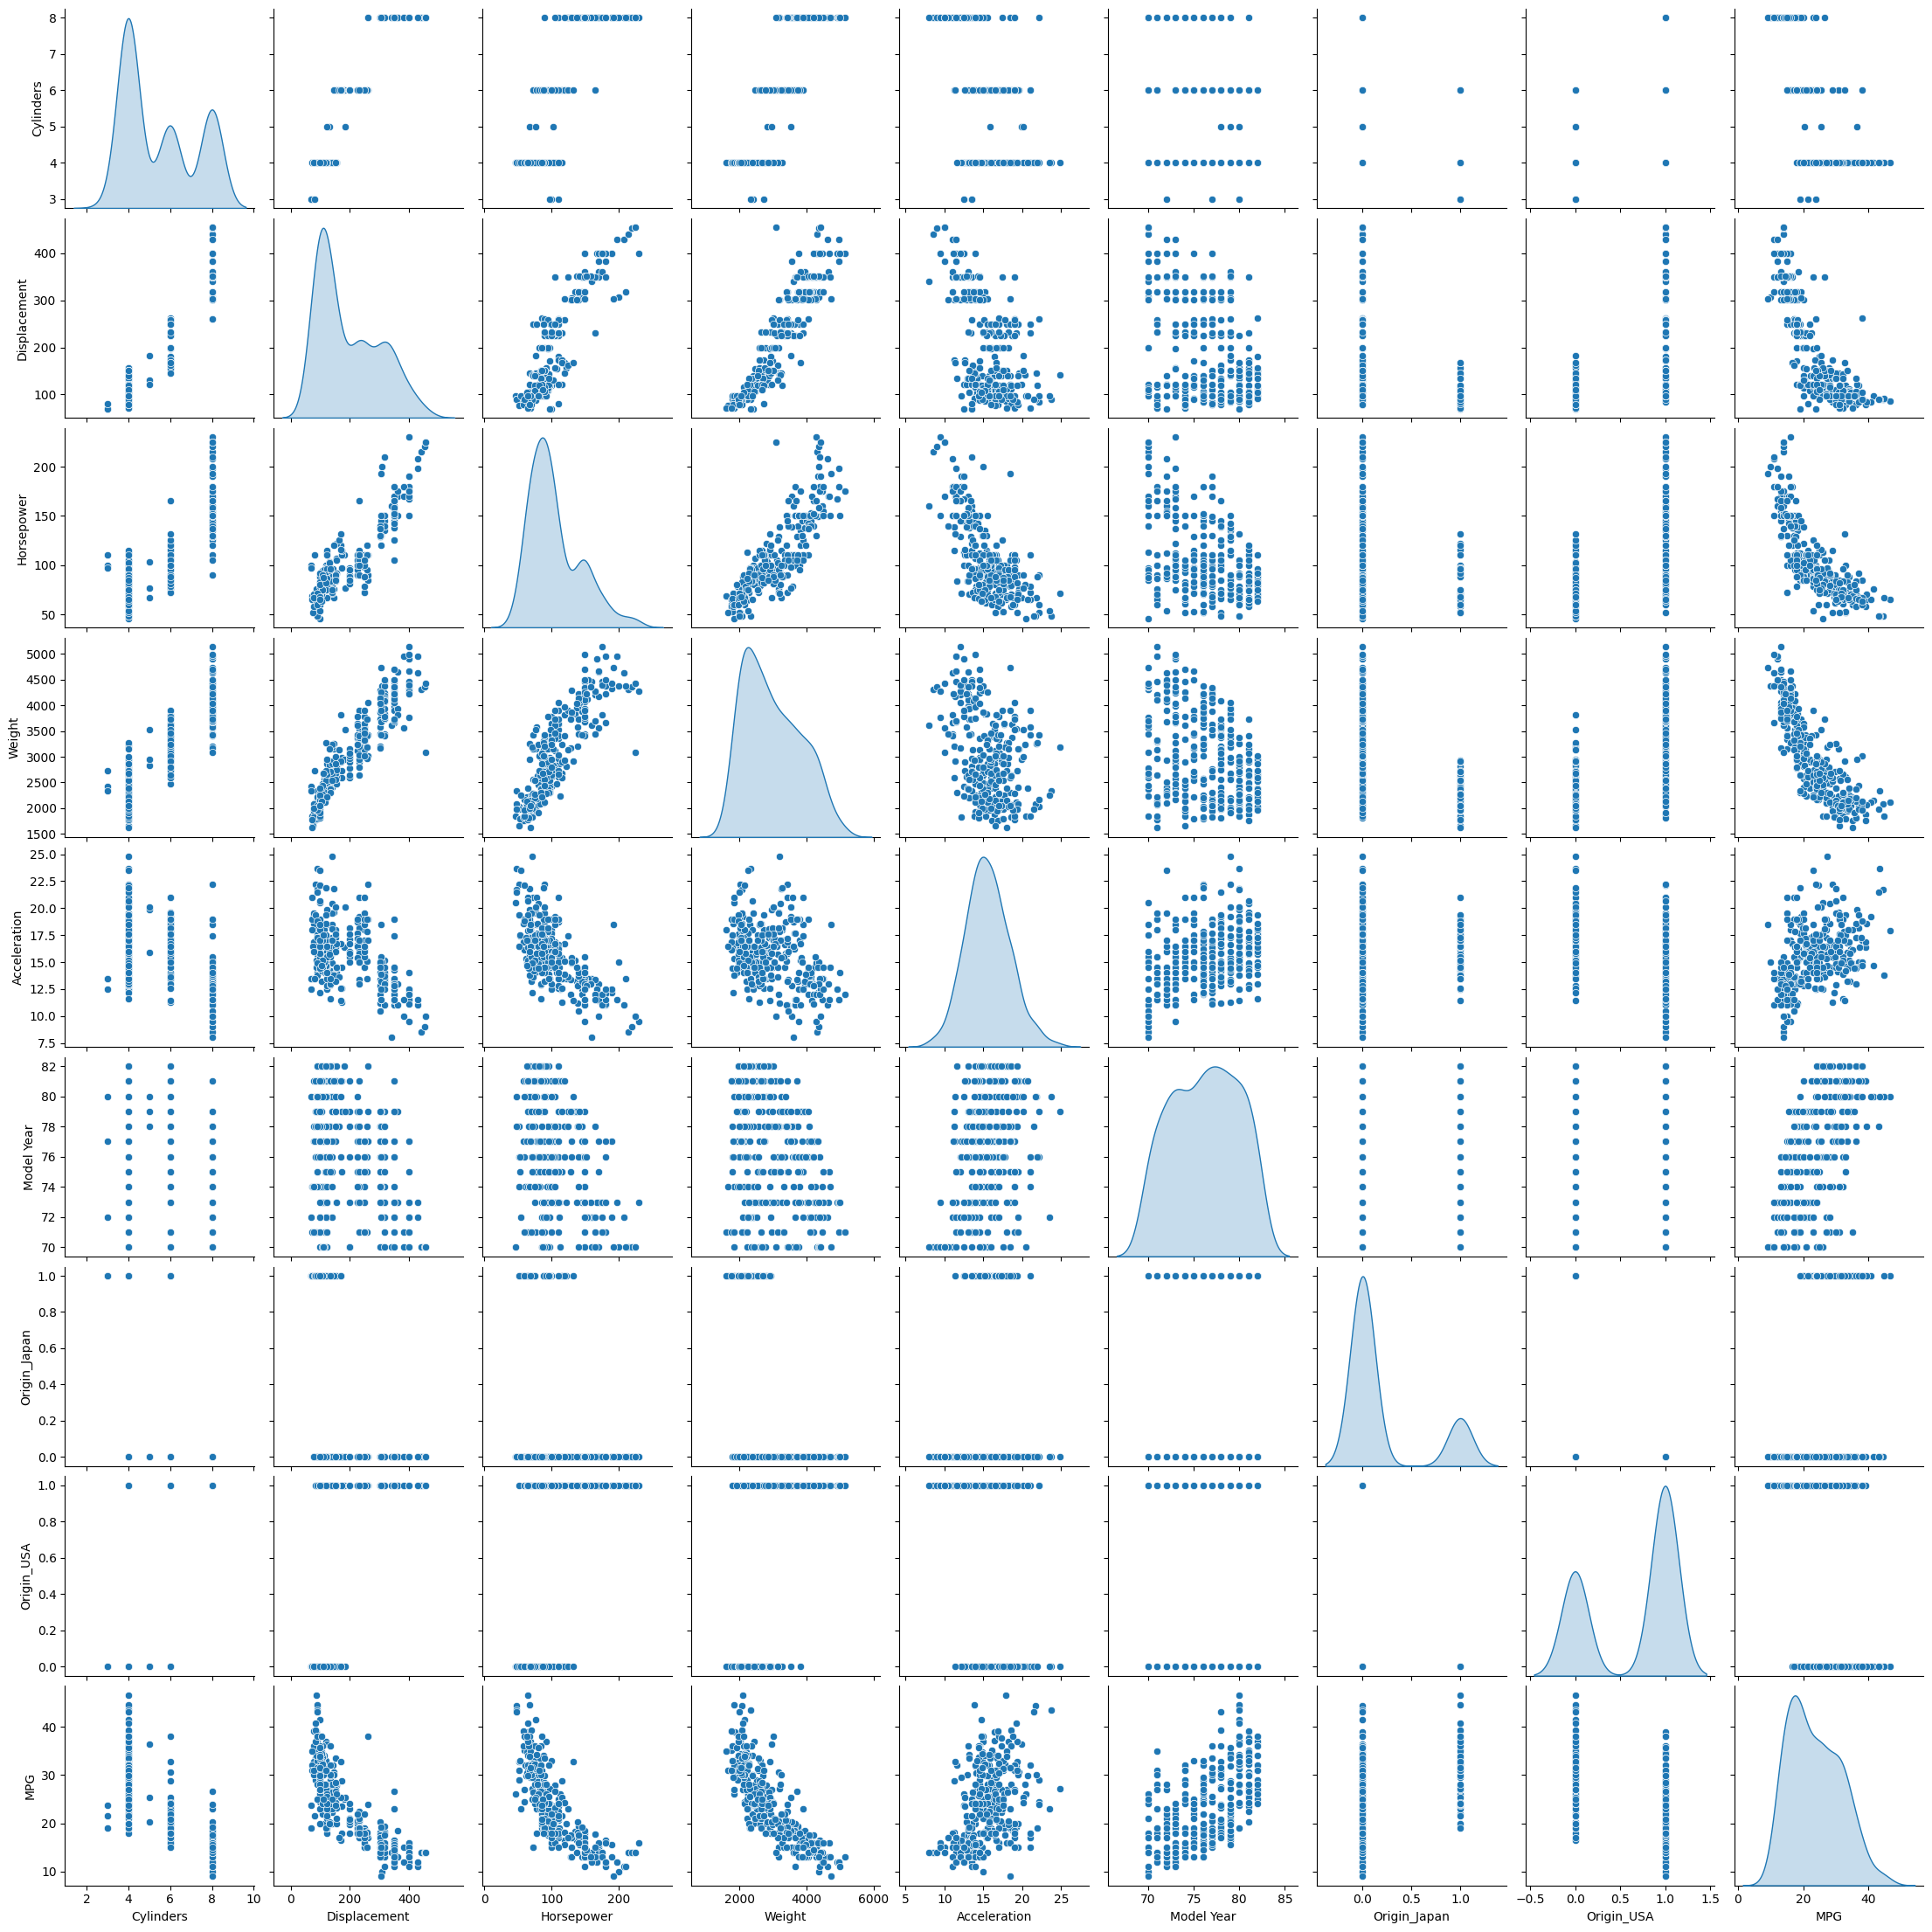

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Unir X_train con y_train para visualizar la relación con el target
df_train = X_train.copy()
df_train['MPG'] = y_train  # Agregamos la variable objetivo

# Crear un pairplot para ver relaciones entre variables
sns.pairplot(df_train, diag_kind="kde")

# Mostrar gráfico
plt.show()


### Ejercicio 6 

Independientemente de lo que hayas encontrado en el análisis anterior, vamos a utilizar todas las features y antes las vamos a escalar. Estandardiza train y test.

In [10]:
from sklearn.preprocessing import StandardScaler

# Eliminar la columna "Car Name" antes de escalar
X_train_numeric = X_train.drop(columns=["Car Name"])
X_test_numeric = X_test.drop(columns=["Car Name"])

# Inicializar StandardScaler
scaler = StandardScaler()

# Ajustar y transformar el set de entrenamiento
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Solo transformar el set de test (sin volver a ajustar)
X_test_scaled = scaler.transform(X_test_numeric)

# Convertir a DataFrame con los mismos nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_numeric.columns, index=X_test.index)

# Verificar los datos escalados
print("\nDatos escalados (primeras filas de X_train_scaled):")
print(X_train_scaled.head())



Datos escalados (primeras filas de X_train_scaled):
     Cylinders  Displacement  Horsepower    Weight  Acceleration  Model Year  \
260   0.304862      0.284578    0.141429  0.754803      1.121759    0.494528   
184  -0.873184     -0.535880   -0.329499 -0.493129     -0.228940   -0.057298   
174   0.304862     -0.236655   -0.198685 -0.002530     -0.371118   -0.333211   
64    1.482907      1.182255    1.187934  1.368052     -0.726565   -1.160950   
344  -0.873184     -1.057113   -1.062052 -1.323099      0.304231    1.322266   

     Origin_Japan  Origin_USA  
260     -0.501996    0.741286  
184     -0.501996    0.741286  
174     -0.501996    0.741286  
64      -0.501996    0.741286  
344     -0.501996    0.741286  


## El modelo

### Ejercicio 7: Construye el modelo con Keras

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Es decir una MLP con dos capas ocultas.

Por tanto, tendrá tres capas. Una inicial con activación relu (usa el argumento `input_shape` para darle el número de features). Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres interesantes para las dos primeras capas (NOTA: En este caso partimos de pocas features, por lo que puede ser interesante poner 2 o 3 como mínimo el número de features para poder obtener unas pseudofeatures que intenten capturar las interrelaciones.)

Otros datos:

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

Utiliza una aproximación en prisma (mismo numero de unidades en las capas ocultas)

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Número de features (columnas en X_train_scaled)
n_features = X_train_scaled.shape[1]

# Definir el modelo secuencial
model = keras.Sequential([
    layers.Dense(n_features * 3, activation='relu', input_shape=[n_features]),  # Capa oculta 1
    layers.Dense(n_features * 3, activation='relu'),  # Capa oculta 2
    layers.Dense(1)  # Capa de salida (regresión)
])

# Compilar el modelo
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss='mse',
    metrics=['mae', 'mse']
)

# Mostrar la arquitectura del modelo
model.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 841 (3.29 KB)

 Trainable params: 841 (3.29 KB)

 Non-trainable params: 0 (0.00 B)

### Ejercicio 8

Inspecciona el modelo usando el método `.summary` para imprimir una descripción simple del modelo

### Ejercicio 9 Entrenar el modelo

Entrena el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

In [12]:
# Entrenar el modelo
history = model.fit(
    X_train_scaled, y_train,  # Datos de entrenamiento
    epochs=1000,  # Número de épocas
    validation_split=0.2,  # 20% de los datos de entrenamiento se usan para validación
    verbose=1  # Mostrar progreso
)


Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 609.6404 - mae: 23.3249 - mse: 609.6404 - val_loss: 668.7416 - val_mae: 24.6158 - val_mse: 668.7416
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 602.3694 - mae: 23.1663 - mse: 602.3694 - val_loss: 655.9073 - val_mae: 24.3401 - val_mse: 655.9073
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 575.2854 - mae: 22.5734 - mse: 575.2854 - val_loss: 642.2980 - val_mae: 24.0493 - val_mse: 642.2980
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 571.3465 - mae: 22.3676 - mse: 571.3465 - val_loss: 627.3095 - val_mae: 23.7251 - val_mse: 627.3095
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 547.0944 - mae: 21.7979 - mse: 547.0944 - val_loss: 611.0438 - val_mae: 23.3622 - val_mse: 611.0438
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 517.2053 - mae: 21.2649 - mse: 517.2053 - val_loss: 593.1513 - val_mae: 22.9600 - val_mse: 593.1513
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step -

### Ejercicio 10

Visualiza el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`. Muestra la evolución del error en train y validation por un lado, y la evolución de la pérdida (loss), también train contra validation, en otra.

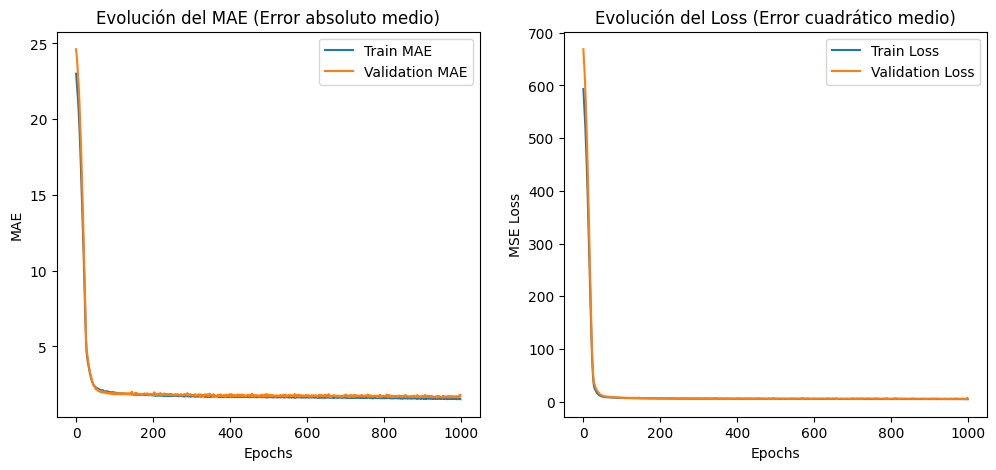

In [13]:
import matplotlib.pyplot as plt

# Extraer datos del entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

# Crear figura con 2 subgráficos
plt.figure(figsize=(12, 5))

# Gráfico 1: Evolución del MAE (Error absoluto medio)
plt.subplot(1, 2, 1)
plt.plot(mae, label='Train MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Evolución del MAE (Error absoluto medio)')

# Gráfico 2: Evolución del Loss (MSE)
plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Evolución del Loss (Error cuadrático medio)')

plt.show()


### Ejercicio 11

Comenta las gráficas anteriores.

In [14]:
#Las dos lineas tanto train como validación bajan a la vez, por lo que el modelo está aprendiendo bien.

### Ejercicio 12

Independientemente de lo comentado en 11, vamos a añadir un callback al entrenamiento. Para ello, construye el modelo otra vez y vuelve a compilarlo (si no lo haces, como ya sabes comenzará el entrenamiento donde lo dejó y no nos valdrá el callback para nada). Entrena el modelo con los mismos hiperparámetros del ejercicio 10 y pinta la gráfica de evolución de los errores e interprétalo (obten el MAE medio una vez "estabilizado" el entrenamiento).  

Para el earlystopping utiliza un margen de 20 epochs.

Epoch 1/1000


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 603.3925 - mae: 23.2852 - mse: 603.3925 - val_loss: 664.6551 - val_mae: 24.5643 - val_mse: 664.6551
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 598.9459 - mae: 23.1334 - mse: 598.9459 - val_loss: 650.6915 - val_mae: 24.2536 - val_mse: 650.6915
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 539.7655 - mae: 21.9095 - mse: 539.7655 - val_loss: 636.5805 - val_mae: 23.9378 - val_mse: 636.5805
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 562.0842 - mae: 22.0919 - mse: 562.0842 - val_loss: 621.7762 - val_mae: 23.6027 - val_mse: 621.7762
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 555.2994 - mae: 21.9918 - mse: 555.2994 - val_loss: 605.5002 - val_mae: 23.2317 - val_mse: 605.5002
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 503.3553 - mae: 20.8980 - mse: 503.3553 - val_loss: 587.5382 - val_mae: 22.8145 - val_mse: 587.5382
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 476.32

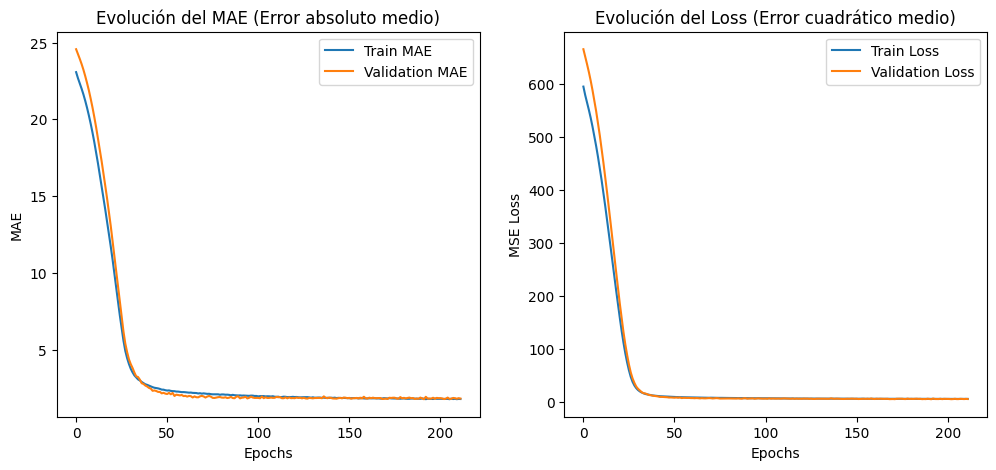

MAE medio después de estabilizar: 1.8202


In [15]:
from tensorflow.keras.callbacks import EarlyStopping

# Recrear y recompilar el modelo desde cero
model = keras.Sequential([
    layers.Dense(X_train_scaled.shape[1] * 3, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(X_train_scaled.shape[1] * 3, activation='relu'),
    layers.Dense(1)
])

# Compilar el modelo
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss='mse',
    metrics=['mae', 'mse']
)

# Definir el callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Entrenar el modelo con EarlyStopping
history = model.fit(
    X_train_scaled, y_train,
    epochs=1000,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

# Extraer los resultados del historial
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

# Crear figura con 2 subgráficos
plt.figure(figsize=(12, 5))

# Gráfico 1: Evolución del MAE (Error absoluto medio)
plt.subplot(1, 2, 1)
plt.plot(mae, label='Train MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Evolución del MAE (Error absoluto medio)')

# Gráfico 2: Evolución del Loss (MSE)
plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Evolución del Loss (Error cuadrático medio)')

plt.show()

# Calcular el MAE medio una vez estabilizado (al final del entrenamiento)
mean_mae = val_mae[-20:]  # Tomamos los últimos 20 valores de MAE en validación después de estabilizar
mean_mae = sum(mean_mae) / len(mean_mae)

print(f"MAE medio después de estabilizar: {mean_mae:.4f}")


Interpreta el gráfico

### Ejercicio 13

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [16]:
# Evaluar el modelo en el conjunto de test
test_loss, test_mae, test_mse = model.evaluate(X_test_scaled, y_test)

# Mostrar los resultados
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.6860 - mae: 1.7908 - mse: 5.6860 
Test Loss (MSE): 6.4210
Test MAE: 1.8460
Test MSE: 6.4210


### Ejercicio 14

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


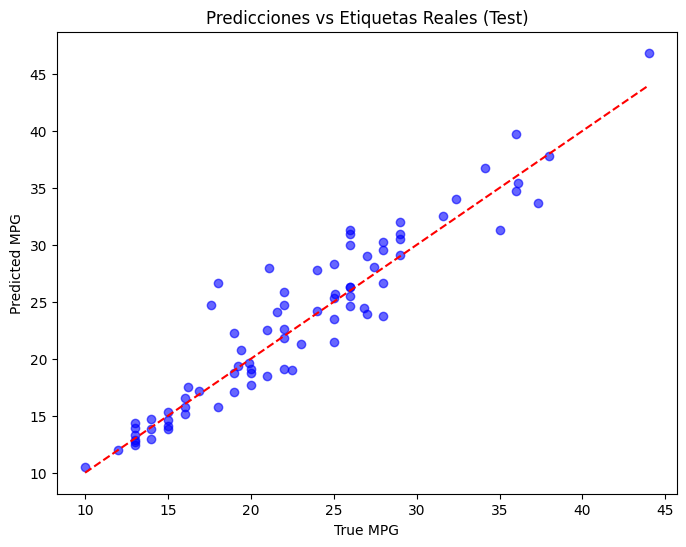

In [17]:
# Obtener las predicciones del conjunto de test
y_pred = model.predict(X_test_scaled)

# Crear el scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.xlabel('True MPG')
plt.ylabel('Predicted MPG')
plt.title('Predicciones vs Etiquetas Reales (Test)')
plt.show()
